In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
print("Dataset of Movies:\n",movies)
print("Dataset of Ratings:\n",ratings)

Dataset of Movies:
       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  

In [3]:
# Merge movie and rating data
movie_ratings = pd.merge(ratings, movies, on='movieId')
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [4]:
movie_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [5]:
genres = movies['genres']
gc = genres.value_counts().head()
gc

Drama             1053
Comedy             946
Comedy|Drama       435
Comedy|Romance     363
Drama|Romance      349
Name: genres, dtype: int64

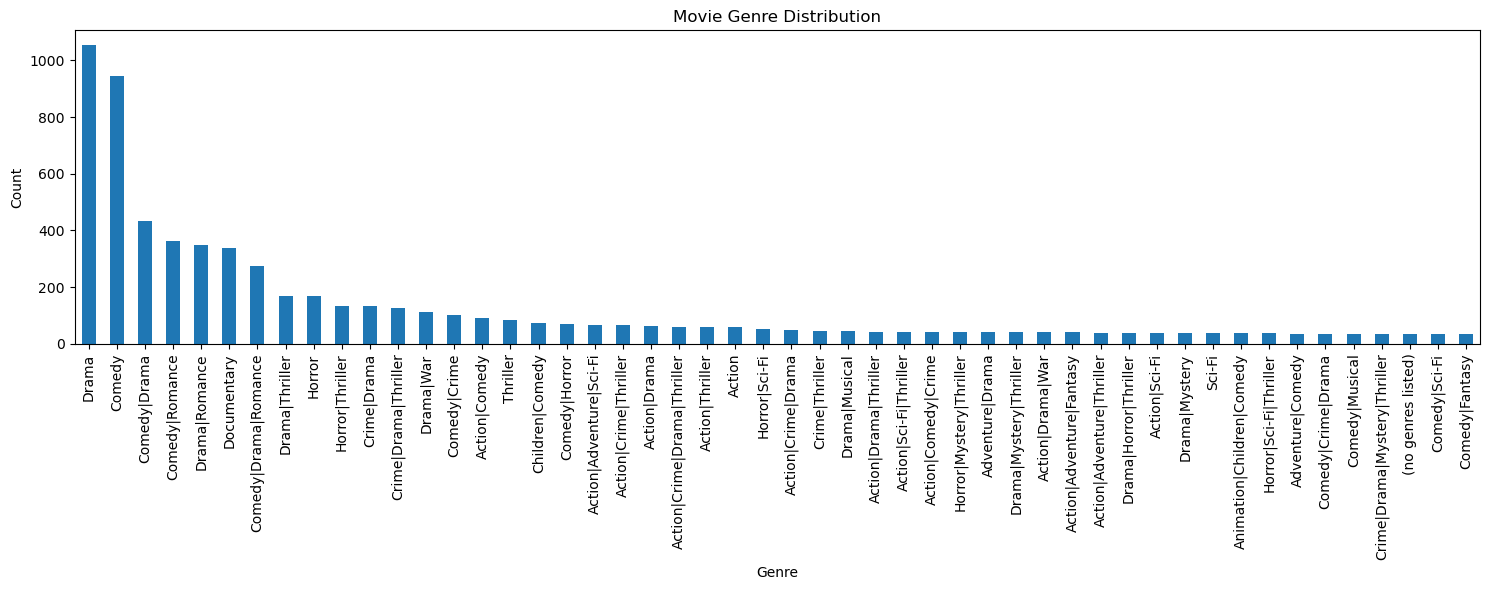

In [6]:
plt.figure(figsize=(15,6))
genres.value_counts().head(50).plot(kind='bar')
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

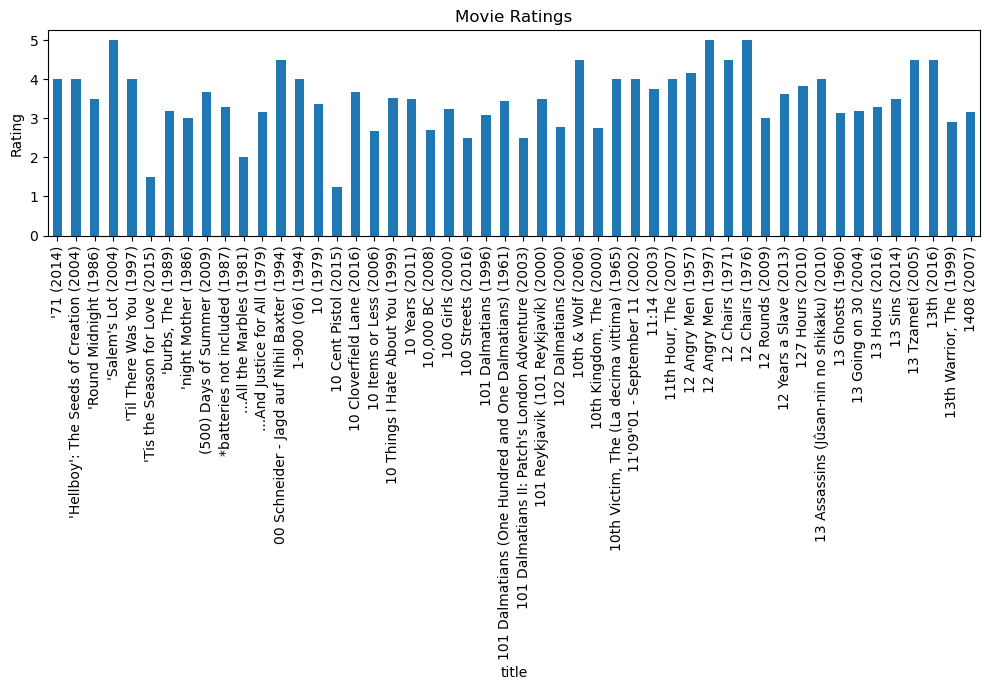

In [7]:
tt = top_rated_movies = movie_ratings.groupby('title')['rating'].mean()[:50]

plt.figure(figsize=(10, 7))
tt.plot(kind='bar')
plt.title('Movie Ratings')

plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

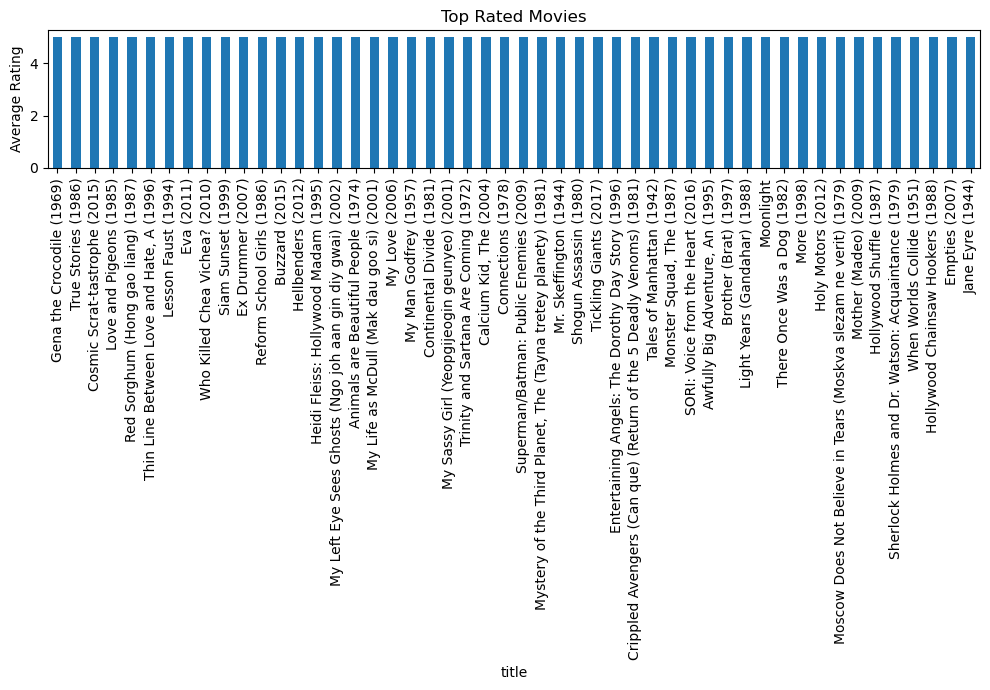

In [8]:
top_rated_movies = movie_ratings.groupby('title')['rating'].mean().sort_values(ascending=False)[:50]

plt.figure(figsize=(10, 7))
top_rated_movies.plot(kind='bar')
plt.title('Top Rated Movies')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
user_movie_ratings = movie_ratings.pivot_table(index='userId', columns='title', values='rating')
user_movie_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
user_movie_ratings = user_movie_ratings.fillna(0)
user_movie_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
user_movie_ratings.isnull().sum()

title
'71 (2014)                                   0
'Hellboy': The Seeds of Creation (2004)      0
'Round Midnight (1986)                       0
'Salem's Lot (2004)                          0
'Til There Was You (1997)                    0
                                            ..
eXistenZ (1999)                              0
xXx (2002)                                   0
xXx: State of the Union (2005)               0
¡Three Amigos! (1986)                        0
À nous la liberté (Freedom for Us) (1931)    0
Length: 9719, dtype: int64

In [12]:
movie_similarity = cosine_similarity(user_movie_ratings.T)

In [13]:
def get_movie_recommendations(movie_title, num_recommendations=5):
    movie_idx = user_movie_ratings.columns.get_loc(movie_title)
    similar_movies = list(enumerate(movie_similarity[movie_idx]))
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    recommended_movie_indices = [movie[0] for movie in similar_movies]
    recommended_movies = user_movie_ratings.columns[recommended_movie_indices]
    return recommended_movies

In [14]:
movie_title = 'Blair Witch (2016)'
recommendations = get_movie_recommendations(movie_title)
print(f"Recommended movies for '{movie_title}':")
for movie in recommendations:
    print(movie)


Recommended movies for 'Blair Witch (2016)':
13 Sins (2014)
31 (2016)
ABCs of Death, The (2012)
Abandoned, The (2006)
Absentia (2011)


In [19]:
target_movie_title = "The Avengers (2012)"

specific_movie = movies[movies['title'] == target_movie_title]

print("Specific Movie:")
print(specific_movie)

Specific Movie:
Empty DataFrame
Columns: [movieId, title, genres]
Index: []
